In [1]:
import pickle 

import pandas as pd
import numpy as np

import gc

from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

import random
import nltk

from nltk.tokenize import sent_tokenize, RegexpTokenizer
from nltk.corpus import stopwords


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

random.seed(42)

pd.set_option('display.max_rows', 500)
nltk.download('stopwords')

turkish_stop_words = set(stopwords.words('turkish'))

[nltk_data] Downloading package stopwords to /home/toprak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def extract_unigrams(text: list) -> pd.DataFrame:
    vectorizer = CountVectorizer(ngram_range =(1, 1), max_df=1.0, min_df=1)
    X1 = vectorizer.fit_transform(text) 
    features = vectorizer.get_feature_names()

    sums = X1.sum(axis = 0)
    data1 = []
    for col, term in enumerate(features):
        data1.append( (term, sums[0, col] ))
    ranking = pd.DataFrame(data1, columns = ['unigram', 'rank'])
    return ranking.sort_values('rank', ascending = False)

In [3]:
def extract_bigrams(text: list) -> pd.DataFrame:
    vectorizer = CountVectorizer(ngram_range =(2, 2), max_df=0.5, min_df=2)
    X1 = vectorizer.fit_transform(text) 
    features = vectorizer.get_feature_names()

    sums = X1.sum(axis = 0)
    data1 = []
    for col, term in enumerate(features):
        data1.append( (term, sums[0, col] ))
    ranking = pd.DataFrame(data1, columns = ['bigram', 'rank'])
    return ranking.sort_values('rank', ascending = False)

In [4]:
def extract_trigrams(text: list) -> pd.DataFrame:
    vectorizer = CountVectorizer(ngram_range =(3, 3), max_df=0.5, min_df=2)
    X1 = vectorizer.fit_transform(text) 
    features = vectorizer.get_feature_names()

    sums = X1.sum(axis = 0)
    data1 = []
    for col, term in enumerate(features):
        data1.append( (term, sums[0, col] ))
    ranking = pd.DataFrame(data1, columns = ['trigram', 'rank'])
    return ranking.sort_values('rank', ascending = False)

In [5]:
def extract_fourgrams(text: list) -> pd.DataFrame:
    vectorizer = CountVectorizer(ngram_range =(4, 4), max_df=0.5, min_df=2)
    X1 = vectorizer.fit_transform(text) 
    features = vectorizer.get_feature_names()

    sums = X1.sum(axis = 0)
    data1 = []
    for col, term in enumerate(features):
        data1.append( (term, sums[0, col] ))
    ranking = pd.DataFrame(data1, columns = ['fourgram', 'rank'])
    return ranking.sort_values('rank', ascending = False)

In [6]:
kk_pairs = [
    {'start':1597.04, 'end':2753.92},
    {'start':1258.7, 'end':2830.5},
    {'start':1660.0, 'end':2963.0},
    {'start':3640.22, 'end':5269.59},
    {'start':2647.52, 'end':3894.44},
    {'start':1743.04, 'end':3123.18},
    {'start':2807.0, 'end':4416},
    {'start':1791.8, 'end':3486.56}  
           ]

In [7]:
with open('KK_and_RTE_language_analysis_final.pkl', 'rb') as f:
    analysis = pickle.load(f)

In [8]:
cleaned_kk_scripts = []
time_index = 0
for kk_script in analysis['KK']:
    if len(kk_pairs[time_index]) > 0:
        scripts = [script['text'] for script in kk_script['raw_scripts']
                   if (script['start'] >= kk_pairs[time_index]['start']) & (script['end'] <= kk_pairs[time_index]['end'])]
        cleaned_kk_scripts.append(scripts)
    else:
        cleaned_kk_scripts.append([])
    time_index += 1

In [9]:
cleaned_rte_scripts = []
for rte_script in analysis['RTE']:
    scripts = [script['text'] for script in rte_script['raw_scripts']]
    cleaned_rte_scripts.append(sent_tokenize(''.join(scripts)))

In [10]:
cleaned_kk_scripts = [sent_tokenize(''.join(scripts)) for scripts in cleaned_kk_scripts if len(scripts)>0]

In [11]:
cleaned_analysis = {}
cleaned_analysis['KK'] = cleaned_kk_scripts
cleaned_analysis['RTE'] = cleaned_rte_scripts

In [12]:
tokenizer = RegexpTokenizer(r'\w+')

punct_removed_analysis = {}
punct_removed_analysis['KK'] = [[" ".join(tokenizer.tokenize(script)) for script in scripts] for scripts in cleaned_kk_scripts]
punct_removed_analysis['RTE'] = [[" ".join(tokenizer.tokenize(script)) for script in scripts] for scripts in cleaned_rte_scripts]

In [13]:
non_stop_words_punct_removed_analysis = {}
non_stop_words_punct_removed_analysis['KK'] = [[" ".join([word.lower() for word in script.split() if word.lower() not in turkish_stop_words]) 
                                                for script in scripts] 
                                               for scripts in punct_removed_analysis['KK']]
non_stop_words_punct_removed_analysis['RTE'] = [[" ".join([word.lower() for word in script.split() if word.lower() not in turkish_stop_words]) 
                                                for script in scripts] 
                                               for scripts in punct_removed_analysis['RTE']]

In [14]:
non_stop_words_punct_removed_analysis['KK'][0]

['değişime hazır mıyız',
 'söz',
 'alın terinden yana değişime hazır mıyız',
 'hiçbir çocuğun yatağa aç girmediği bir türkiye yi gerçekleştirmeye hazır mıyız',
 'gençlerin gençlerin hakkını hukukunu korumaya hazır mıyız',
 'hazırsanız bay kemal hazır',
 'beraber yapacağız',
 'birlikte yapacağız',
 'birlikte gerçekleştireceğiz',
 'allah',
 'gençler zaman sizden başlayayım',
 'bir kesinlikle kpss mülakat bitecek',
 'neyi kazandıysanız atamanız yapılacak',
 'konuda söz',
 'iki iki bütün köy okullarını yeniden açacağız',
 'yüz bin öğretmenin atamasını yapacağız',
 'yüz bin öğretmenim',
 'dolayısıyla yüz bin öğretmen gençler gidecekler ferhat şirin in buluştuğu öğrenciyle öğretmeni buluşturacağım',
 'endişe etmeyin',
 'genç pırıl pırıl öğretmenlerin görevlerinin başında olacak',
 'köylerde çalışan bütün gençlerin tarlada bağda bahçede çalışan bütün gençlerin kadınların sosyal güvenlik primini devlet olarak ödeyeceğiz',
 'çalışacaklar primlerini ödeyeceğiz',
 'öylece hiçbir kadın bir başka k

In [15]:
punct_removed_analysis['KK']

[['Değişime hazır mıyız',
  'Söz mü',
  'Alın terinden yana değişime hazır mıyız',
  'Hiçbir çocuğun yatağa aç girmediği bir Türkiye yi gerçekleştirmeye hazır mıyız',
  'Gençlerin gençlerin hakkını hukukunu korumaya hazır mıyız',
  'Siz hazırsanız Bay Kemal de hazır',
  'Beraber yapacağız',
  'Birlikte yapacağız',
  'Birlikte gerçekleştireceğiz',
  'Allah',
  'Gençler o zaman sizden başlayayım',
  'Bir kesinlikle KPSS de mülakat bitecek',
  'Neyi kazandıysanız atamanız yapılacak',
  'Bu konuda söz',
  'Iki iki bütün köy okullarını yeniden açacağız',
  'Yüz bin öğretmenin atamasını yapacağız',
  'Yüz bin öğretmenim',
  'Dolayısıyla yüz bin öğretmen gençler gidecekler Ferhat ile Şirin in buluştuğu gibi öğrenciyle öğretmeni buluşturacağım',
  'Hiç endişe etmeyin',
  'Genç pırıl pırıl öğretmenlerin hepsi görevlerinin başında olacak',
  'Köylerde çalışan bütün gençlerin tarlada bağda bahçede çalışan bütün gençlerin ve kadınların sosyal güvenlik primini devlet olarak biz ödeyeceğiz',
  'Çalı

In [16]:
tokenizer = RegexpTokenizer(r'\w+')

tokenized_analysis = {}
tokenized_analysis['KK'] = [[tokenizer.tokenize(script) for script in scripts] for scripts in cleaned_kk_scripts]
tokenized_analysis['RTE'] = [[tokenizer.tokenize(script) for script in scripts] for scripts in cleaned_rte_scripts]

In [17]:
all_KK_scripts = []
for scripts in tokenized_analysis['KK']:
    all_KK_scripts.extend(sum(scripts, []))

all_KK_scripts = [word for word in all_KK_scripts if len(word) > 2]

In [18]:
all_RTE_scripts = []
for scripts in tokenized_analysis['RTE']:
    all_RTE_scripts.extend(sum(scripts, []))

all_RTE_scripts = [word for word in all_RTE_scripts if len(word) > 2]

In [19]:
def count_words(scripts:list, searched_word_list:list) -> dict:
    searched_words_counts = {key:0 for key in searched_word_list}
    for searched_word in searched_words_counts.keys():
        count = len([word for word in scripts 
                                                    if searched_word in word.lower()
                                                    .replace("ü", 'u')
                                                    .replace('ö', 'o')
                                                    .replace('ş', 's')
                                                    .replace('ç', 'c')
                                                    .replace('ğ', 'g')]) 
        searched_words_counts[searched_word] = len(scripts)/count if count > 0 else 0
    return searched_words_counts

In [20]:
religious_words = ['allah', 'islam', 'namaz', 'musluman', 'gunah', 'cehennem', 'cennet']

print(count_words(all_KK_scripts, religious_words))
print(count_words(all_RTE_scripts, religious_words))

{'allah': 307.13461538461536, 'islam': 0, 'namaz': 0, 'musluman': 0, 'gunah': 3194.2, 'cehennem': 0, 'cennet': 15971.0}
{'allah': 259.80392156862746, 'islam': 0, 'namaz': 0, 'musluman': 0, 'gunah': 0, 'cehennem': 0, 'cennet': 26500.0}


In [21]:
terrorism_words = ['ocalan', 'teror', 'pkk', 'hizbullah', 'silah', 'bomba', 'savas']

print(count_words(all_KK_scripts, terrorism_words))
print(count_words(all_RTE_scripts, terrorism_words))

{'ocalan': 0, 'teror': 1451.909090909091, 'pkk': 0, 'hizbullah': 0, 'silah': 0, 'bomba': 0, 'savas': 3992.75}
{'ocalan': 13250.0, 'teror': 456.8965517241379, 'pkk': 662.5, 'hizbullah': 0, 'silah': 2944.4444444444443, 'bomba': 13250.0, 'savas': 1892.857142857143}


In [22]:
speaking_words = ['canim', 'kardes', 'sevgili', 'dost', 'yoldas']

print(count_words(all_KK_scripts, speaking_words))
print(count_words(all_RTE_scripts, speaking_words))

{'canim': 0, 'kardes': 224.94366197183098, 'sevgili': 1330.9166666666667, 'dost': 5323.666666666667, 'yoldas': 0}
{'canim': 0, 'kardes': 187.94326241134752, 'sevgili': 2944.4444444444443, 'dost': 2944.4444444444443, 'yoldas': 5300.0}


In [23]:
candidate_names = ['recep', 'tayyip', 'erdogan', 'kemal', 'kilicdaroglu']

print(count_words(all_KK_scripts, candidate_names))
print(count_words(all_RTE_scripts, candidate_names))

{'recep': 0, 'tayyip': 0, 'erdogan': 0, 'kemal': 207.41558441558442, 'kilicdaroglu': 0}
{'recep': 26500.0, 'tayyip': 13250.0, 'erdogan': 4416.666666666667, 'kemal': 197.76119402985074, 'kilicdaroglu': 0}


In [24]:
governmental_words = ['suriye', 'sinir', 'siginma', 'goc', 'guvenlik', 'asker', 'ordu']

print(count_words(all_KK_scripts, governmental_words))
print(count_words(all_RTE_scripts, governmental_words))

{'suriye': 798.55, 'sinir': 15971.0, 'siginma': 0, 'goc': 7985.5, 'guvenlik': 1996.375, 'asker': 1140.7857142857142, 'ordu': 760.5238095238095}
{'suriye': 2650.0, 'sinir': 0, 'siginma': 0, 'goc': 0, 'guvenlik': 13250.0, 'asker': 2038.4615384615386, 'ordu': 427.4193548387097}


In [25]:
job_words = ['doktor', 'ogretmen', 'muhendis', 'ogrenci', 'issiz', 'atama']

print(count_words(all_KK_scripts, job_words))
print(count_words(all_RTE_scripts, job_words))

{'doktor': 0, 'ogretmen': 290.3818181818182, 'muhendis': 1597.1, 'ogrenci': 3992.75, 'issiz': 1064.7333333333333, 'atama': 798.55}
{'doktor': 26500.0, 'ogretmen': 3785.714285714286, 'muhendis': 0, 'ogrenci': 854.8387096774194, 'issiz': 4416.666666666667, 'atama': 13250.0}


In [26]:
politics_words = ['ataturk', 
                  'selahattin', 
                  'bahceli', 
                  'cumhuriyet', 
                  'demokrasi', 
                  'secim', 
                  'sosyal',
                  'ulkucu', 
                  'milliyetci']

print(count_words(all_KK_scripts, politics_words))
print(count_words(all_RTE_scripts, politics_words))

{'ataturk': 1996.375, 'selahattin': 0, 'bahceli': 0, 'cumhuriyet': 887.2777777777778, 'demokrasi': 1140.7857142857142, 'secim': 1140.7857142857142, 'sosyal': 665.4583333333334, 'ulkucu': 0, 'milliyetci': 399.275}
{'ataturk': 1892.857142857143, 'selahattin': 4416.666666666667, 'bahceli': 0, 'cumhuriyet': 854.8387096774194, 'demokrasi': 2409.090909090909, 'secim': 828.125, 'sosyal': 1060.0, 'ulkucu': 0, 'milliyetci': 3785.714285714286}


In [27]:
party_names = ['akp', 'chp', 'cehape', 'hdp', 'mhp']

print(count_words(all_KK_scripts, party_names))
print(count_words(all_RTE_scripts, party_names))

{'akp': 0, 'chp': 15971.0, 'cehape': 0, 'hdp': 0, 'mhp': 0}
{'akp': 8833.333333333334, 'chp': 500.0, 'cehape': 0, 'hdp': 358.1081081081081, 'mhp': 3785.714285714286}


In [28]:
economics_words = ['para', 'dolar', 'euro', 'ekonomi', 'yatirim', 'fabrika', 'kopru', 'pahali', 'gecin', 'fakir']

print(count_words(all_KK_scripts, economics_words))
print(count_words(all_RTE_scripts, economics_words))

{'para': 187.89411764705883, 'dolar': 1330.9166666666667, 'euro': 0, 'ekonomi': 3992.75, 'yatirim': 0, 'fabrika': 1774.5555555555557, 'kopru': 7985.5, 'pahali': 0, 'gecin': 3992.75, 'fakir': 1228.5384615384614}
{'para': 2409.090909090909, 'dolar': 828.125, 'euro': 0, 'ekonomi': 913.7931034482758, 'yatirim': 0, 'fabrika': 3785.714285714286, 'kopru': 679.4871794871794, 'pahali': 0, 'gecin': 0, 'fakir': 0}


In [29]:
election_words = ['baybay kemal', 'on dort', ' bay kemal', 'cumhurbaskan']

print(count_words(sum(punct_removed_analysis['RTE'], []), election_words))
print(count_words(sum(punct_removed_analysis['KK'], []), election_words))

{'baybay kemal': 54.784615384615385, 'on dort': 34.57281553398058, ' bay kemal': 136.96153846153845, 'cumhurbaskan': 114.87096774193549}
{'baybay kemal': 0, 'on dort': 535.3333333333334, ' bay kemal': 118.96296296296296, 'cumhurbaskan': 128.48}


In [30]:
personal_words = ['ben', 'sen', 'onlar', 'yalniz', 'bunlar']

print(count_words(all_KK_scripts, personal_words))
print(count_words(all_RTE_scripts, personal_words))

{'ben': 91.26285714285714, 'sen': 249.546875, 'onlar': 101.08227848101266, 'yalniz': 0, 'bunlar': 290.3818181818182}
{'ben': 262.3762376237624, 'sen': 196.2962962962963, 'onlar': 427.4193548387097, 'yalniz': 0, 'bunlar': 164.59627329192546}


In [31]:
pd.concat([extract_fourgrams(sum(non_stop_words_punct_removed_analysis['RTE'], []))[:100].reset_index(drop=True), 
           extract_trigrams(sum(non_stop_words_punct_removed_analysis['RTE'], []))[:100].reset_index(drop=True),
           extract_bigrams(sum(non_stop_words_punct_removed_analysis['RTE'], []))[:100].reset_index(drop=True),
           extract_unigrams(sum(non_stop_words_punct_removed_analysis['RTE'], []))[:100].reset_index(drop=True)],axis=1)

,fourgram,rank,trigram,rank,bigram,rank,unigram,rank
0,on dört mayıs ta,65,on dört mayıs,97,on dört,103,bir,720
1,son yirmi bir yılda,14,dört mayıs ta,66,dört mayıs,98,on,201
2,yola devam diyor muyuz,11,yirmi yılda yapılamaz,49,bile asla,96,yüz,167
3,doğru adımlarla yola devam,10,bay bay kemal,23,mayıs ta,74,dört,152
4,dört mayıs ta türkiye,10,yirmi bir yılda,22,baybay kemal,65,yirmi,147
5,bakırköy belediye başkanı nın,9,son yirmi bir,18,yirmi yılda,50,bin,142
6,yaşanan bir dram maalesef,8,bin dokuz yüz,14,yılda yapılamaz,49,türkiye,133
7,hastanemizde yaşanan bir dram,8,bin beş yüz,14,yirmi bir,46,kemal,132
8,resim heykel müzesi ni,8,baybay kemal in,13,böyle bir,33,var,127
9,adımlarla yola devam diyor,8,devam diyor muyuz,11,değil mi,28,şimdi,124


In [32]:
pd.concat([extract_fourgrams(sum(non_stop_words_punct_removed_analysis['KK'], []))[:100].reset_index(drop=True), 
           extract_trigrams(sum(non_stop_words_punct_removed_analysis['KK'], []))[:100].reset_index(drop=True),
           extract_bigrams(sum(non_stop_words_punct_removed_analysis['KK'], []))[:100].reset_index(drop=True),
           extract_unigrams(sum(non_stop_words_punct_removed_analysis['KK'], []))[:100].reset_index(drop=True)],axis=1)

,fourgram,rank,trigram,rank,bigram,rank,unigram,rank
0,yirmi yedi buçuk yıl,10,yirmi yedi buçuk,13,bay kemal,56,bir,471
1,geç iki yıl içinde,8,parayı nereden bulacaksın,13,endişe etmeyin,52,var,230
2,köy okullarını yeniden açacağız,7,bir türkiye yi,12,kul hakkı,38,türkiye,126
3,gazi mustafa kemal atatürk,7,size sözüm var,11,sözüm var,31,bütün,106
4,allah nasip eder sizlerin,6,asgari ücret kadar,11,türkiye nin,29,söz,101
5,yüz on sekiz milyar,6,yedi buçuk yıl,10,güzel bir,29,ben,93
6,beş milyon üç yüz,6,bay kemal in,10,türkiye yi,25,güzel,80
7,sağ elin verdiğini sol,6,gayet iyi biliyorum,10,bir türkiye,25,kemal,76
8,bundan emin olmanızı isterim,6,gazi mustafa kemal,10,huzur içinde,25,yok,73
9,benim size sözüm var,6,on beş bin,10,yüz bin,18,biliyorum,72


In [33]:
# https://huggingface.co/zafercavdar/distilbert-base-turkish-cased-emotion

distilbert_classifier = pipeline("text-classification",
                                 model='zafercavdar/distilbert-base-turkish-cased-emotion',
                                 return_all_scores=True)

/home/toprak/.local/lib/python3.9/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [34]:
# https://huggingface.co/savasy/bert-base-turkish-sentiment-cased

bert_model = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
bert_tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
bert_predictor = pipeline("sentiment-analysis", tokenizer=bert_tokenizer, model=bert_model)

In [35]:
cleaned_candidate_scripts = {'KK':[], 'RTE':[]}
for candidate in cleaned_analysis.keys():
    for script_records in cleaned_analysis[candidate]:
        cleaned_scripts = [records for records in script_records if len(records.split()) > 1 and len(records.split()) < 256]
        cleaned_candidate_scripts[candidate].append(cleaned_scripts)
gc.collect()    

49

In [36]:
candidate_records = []
for candidate in cleaned_candidate_scripts.keys():
    for script_records in cleaned_candidate_scripts[candidate]:
        records = pd.DataFrame({'text':script_records})
        records['candidate'] = candidate
        records['source'] = cleaned_candidate_scripts[candidate].index(script_records)
        candidate_records.append(records)
        
candidate_records = pd.concat(candidate_records)
        
gc.collect()

0

In [37]:
def calculate_negative_positive_score(text:str) -> tuple:
    result = bert_predictor(text.lower())
    return result[0]['label'], result[0]['score'] 

In [38]:
def calculate_emotion_scores(text: str) -> tuple:
    prediction = distilbert_classifier(text.lower())
    return prediction[0][0]['score'], prediction[0][1]['score'], prediction[0][2]['score'], prediction[0][3]['score'], prediction[0][4]['score'], prediction[0][5]['score']

In [39]:
%%time

candidate_records['sentiment_label'], \
candidate_records['sentiment_score'] = zip(*candidate_records.apply(lambda x: calculate_negative_positive_score(x['text']), axis=1))

gc.collect()

CPU times: user 19min 41s, sys: 4.01 s, total: 19min 45s
Wall time: 4min 59s


0

In [40]:
%%time

candidate_records['sadness_score'], \
candidate_records['joy_score'], \
candidate_records['love_score'], \
candidate_records['anger_score'], \
candidate_records['fear_score'], \
candidate_records['surprise_score'] = zip(*candidate_records.apply(lambda x: calculate_emotion_scores(x['text']), axis=1))

gc.collect()

CPU times: user 9min 10s, sys: 1.29 s, total: 9min 11s
Wall time: 2min 18s


0

In [41]:
threshold = candidate_records['sentiment_score'].mean() - candidate_records['sentiment_score'].std()
print(threshold)

0.7127932445824988


In [42]:
sentiment_records = candidate_records[candidate_records['sentiment_score'] > threshold][['candidate', 'source', 'sentiment_label', 'text', 'sadness_score',  'joy_score',  'love_score',  'anger_score',  'fear_score',  'surprise_score']]

In [43]:
sentiment_records_list = []
for candidate in sentiment_records['candidate'].unique():
    for source in sentiment_records[sentiment_records['candidate']==candidate]['source'].unique():
        sentiment_percentage = sentiment_records[(sentiment_records['candidate']==candidate) & (sentiment_records['source']==source)].groupby(['candidate', 'source', 'sentiment_label']).agg(label_count=('sentiment_label', 'count'))
        sentiment_rates = (sentiment_percentage / sentiment_percentage.groupby(level=0).sum()).reset_index()
        sentiment_records_list.append(sentiment_rates)

both_sentiment_records = pd.concat(sentiment_records_list)

In [44]:
sentiment_records[(sentiment_records['candidate']=='KK')].value_counts('sentiment_label', normalize=True)

sentiment_label
negative    0.534633
positive    0.465367
dtype: float64

In [45]:
sentiment_records[(sentiment_records['candidate']=='RTE')].value_counts('sentiment_label', normalize=True)

sentiment_label
negative    0.592219
positive    0.407781
dtype: float64

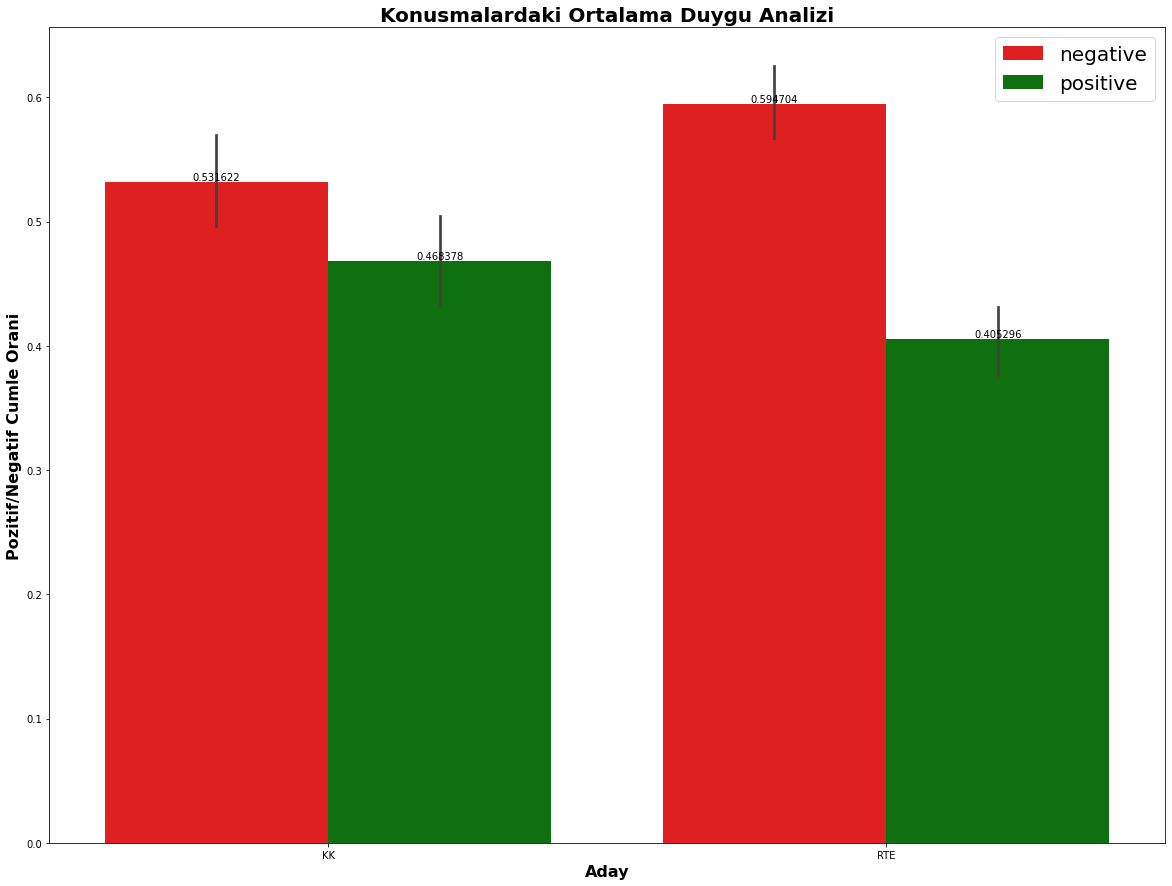

In [46]:
plt.figure(figsize=(20, 15)) 
ax = sns.barplot(x="candidate",
                 y="label_count",
                 hue="sentiment_label",
                 palette=['red', 'green'],
                 data=both_sentiment_records)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Konusmalardaki Ortalama Duygu Analizi', 
          fontsize = 20, 
          loc='center', 
          fontdict=dict(weight='bold'))
plt.xlabel('Aday', fontsize = 16, fontdict=dict(weight='bold'))
plt.ylabel('Pozitif/Negatif Cumle Orani', fontsize = 16, fontdict=dict(weight='bold'))
plt.legend(loc="upper right", frameon=True, fontsize=20)
plt.show()

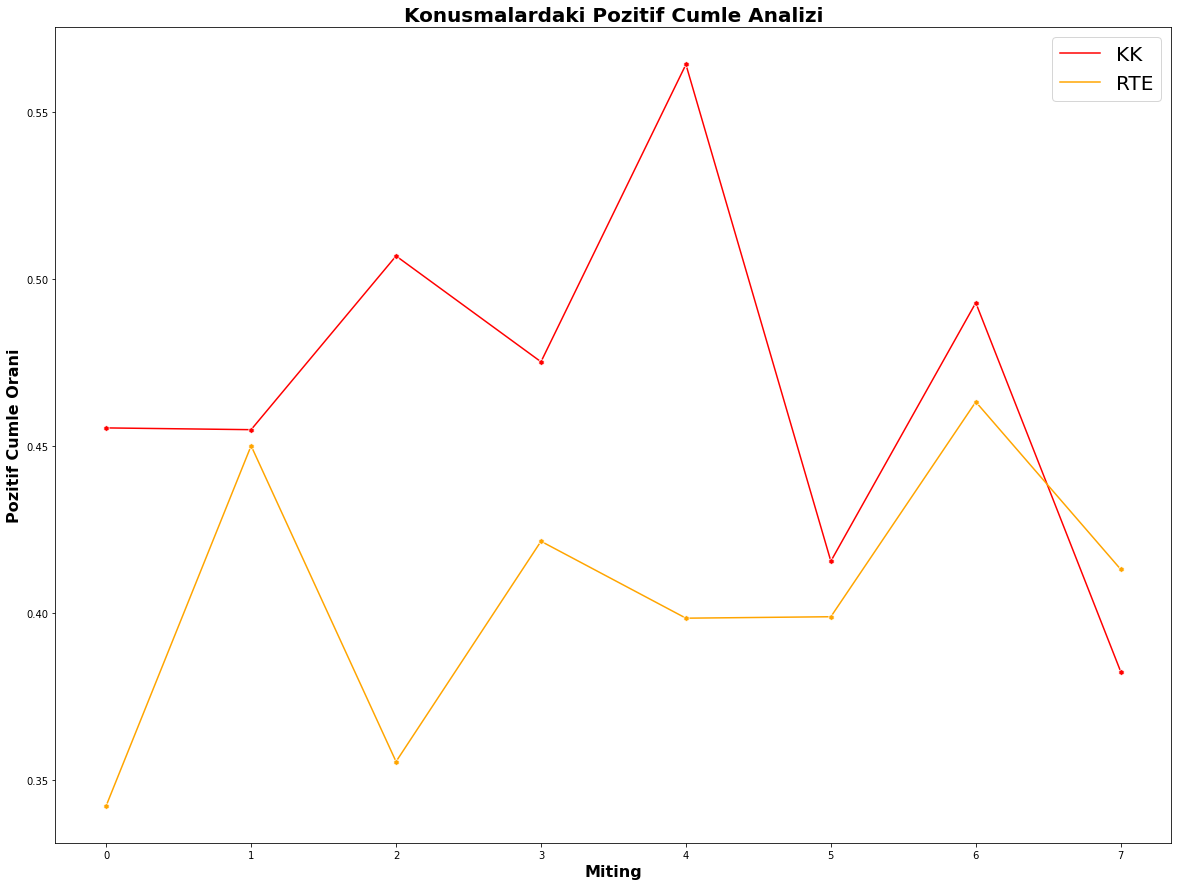

In [47]:
plt.figure(figsize=(20, 15)) 
sns.lineplot(x='source', 
             y='label_count',
             marker= 'h',
             palette=['red', 'orange'],
             hue='candidate',
             data=both_sentiment_records[both_sentiment_records['sentiment_label']=='positive'].reset_index(drop=True))
plt.title('Konusmalardaki Pozitif Cumle Analizi', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
plt.xlabel('Miting', fontsize = 16, fontdict=dict(weight='bold'))
plt.ylabel('Pozitif Cumle Orani', fontsize = 16, fontdict=dict(weight='bold'))
plt.legend(loc="upper right", frameon=True, fontsize=20)
plt.show()

In [48]:
both_sentiment_records[both_sentiment_records['candidate']=='KK']

,candidate,source,sentiment_label,label_count
0,KK,0,negative,0.544643
1,KK,0,positive,0.455357
0,KK,1,negative,0.545171
1,KK,1,positive,0.454829
0,KK,2,negative,0.493151
1,KK,2,positive,0.506849
0,KK,3,negative,0.524845
1,KK,3,positive,0.475155
0,KK,4,negative,0.435798
1,KK,4,positive,0.564202


In [49]:
both_sentiment_records[both_sentiment_records['candidate']=='RTE']

,candidate,source,sentiment_label,label_count
0,RTE,0,negative,0.657795
1,RTE,0,positive,0.342205
0,RTE,1,negative,0.550000
1,RTE,1,positive,0.450000
0,RTE,2,negative,0.644578
1,RTE,2,positive,0.355422
0,RTE,3,negative,0.578595
1,RTE,3,positive,0.421405
0,RTE,4,negative,0.601626
1,RTE,4,positive,0.398374


In [50]:
sentiment_records.value_counts('candidate')

candidate
RTE    2776
KK     2411
dtype: int64

In [51]:
candidate_emotions = []
for candidate in candidate_records['candidate'].unique():
    emotions = candidate_records[(candidate_records['candidate']==candidate)].groupby(['candidate']).agg(sadness_score=('sadness_score', 'mean'),
                                                                                                                                                        joy_score=('joy_score', 'mean'),
                                                                                                                                                        love_score=('love_score', 'mean'),
                                                                                                                                                        anger_score=('anger_score', 'mean'),
                                                                                                                                                        fear_score=('fear_score', 'mean'),
                                                                                                                                                        surprise_score=('surprise_score', 'mean'))
    candidate_emotions.append(emotions)
candidate_emotions = pd.concat(candidate_emotions).reset_index()

In [52]:
print(candidate_emotions.to_string())

  candidate  sadness_score  joy_score  love_score  anger_score  fear_score  surprise_score
0        KK       0.198018   0.508298    0.046653     0.145547    0.088146        0.013337
1       RTE       0.218015   0.420179    0.060066     0.188730    0.097447        0.015564


In [53]:
emotion_records_list = []

for candidate in candidate_records['candidate'].unique():
    for source in candidate_records[candidate_records['candidate']==candidate]['source'].unique():
        emotions = candidate_records[(candidate_records['candidate']==candidate) & (candidate_records['source']==source)].groupby(['candidate', 'source']).agg(uzuntu_puani=('sadness_score', 'mean'),
                                                                                                                                                            nese_puani=('joy_score', 'mean'),
                                                                                                                                                            sevgi_puani=('love_score', 'mean'),
                                                                                                                                                            ofke_puani=('anger_score', 'mean'),
                                                                                                                                                            korku_puani=('fear_score', 'mean'),
                                                                                                                                                            surpriz_puani=('surprise_score', 'mean'))
        emotion_records_list.append(emotions)
    

In [54]:
both_emotion_records = pd.concat(emotion_records_list).reset_index()

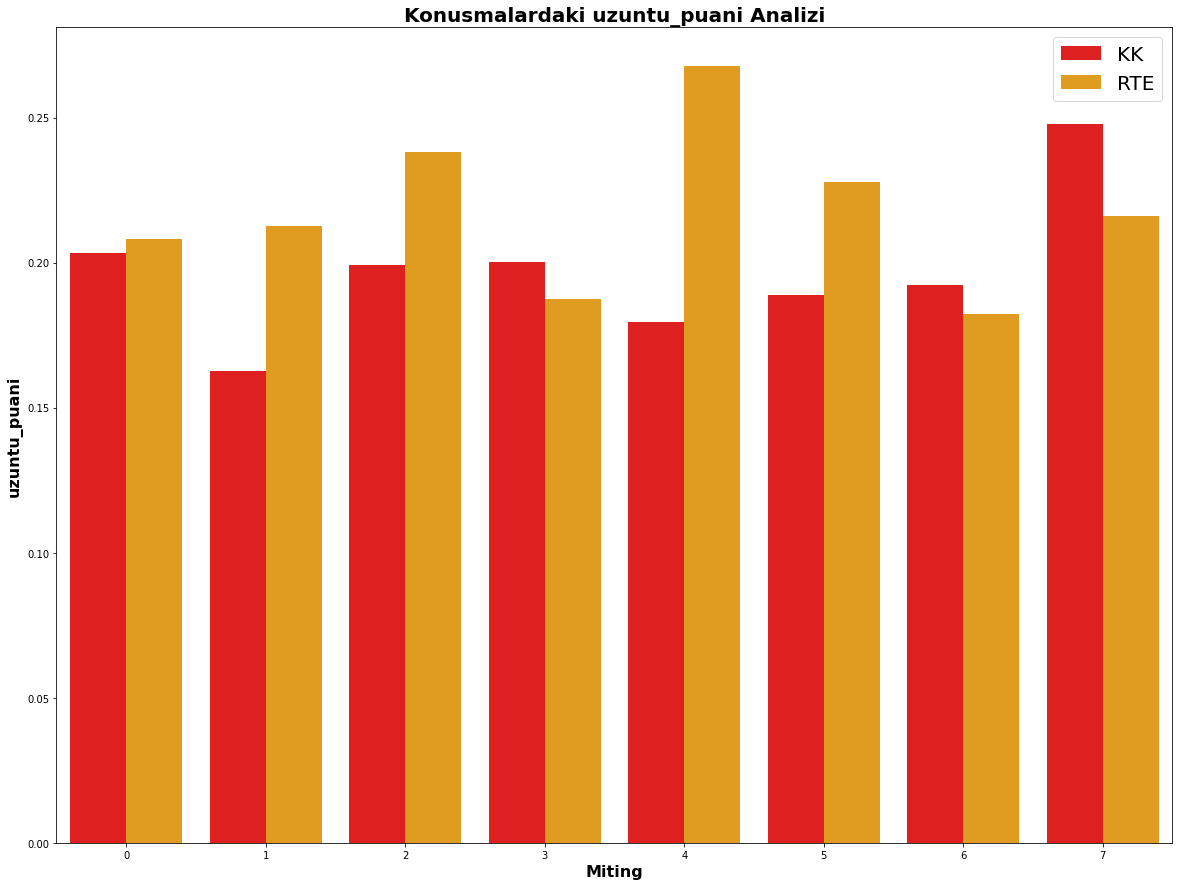

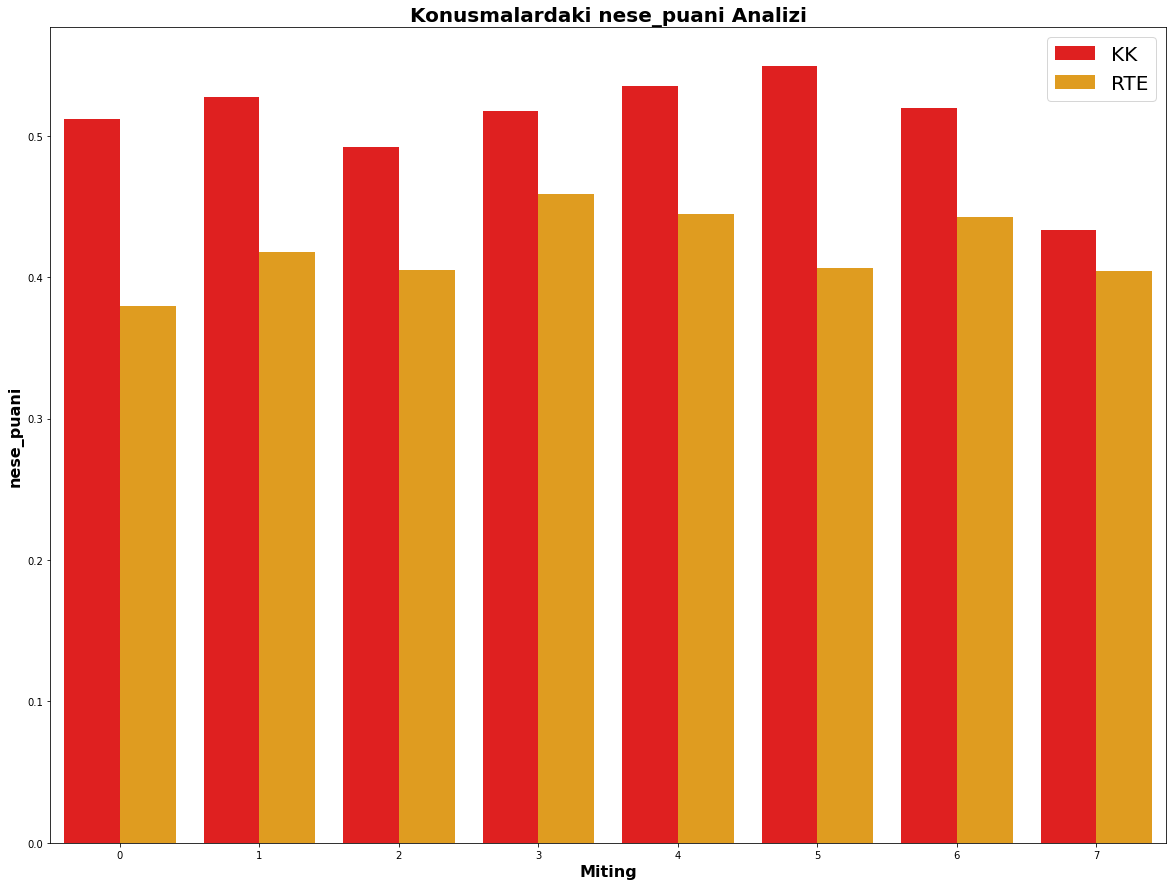

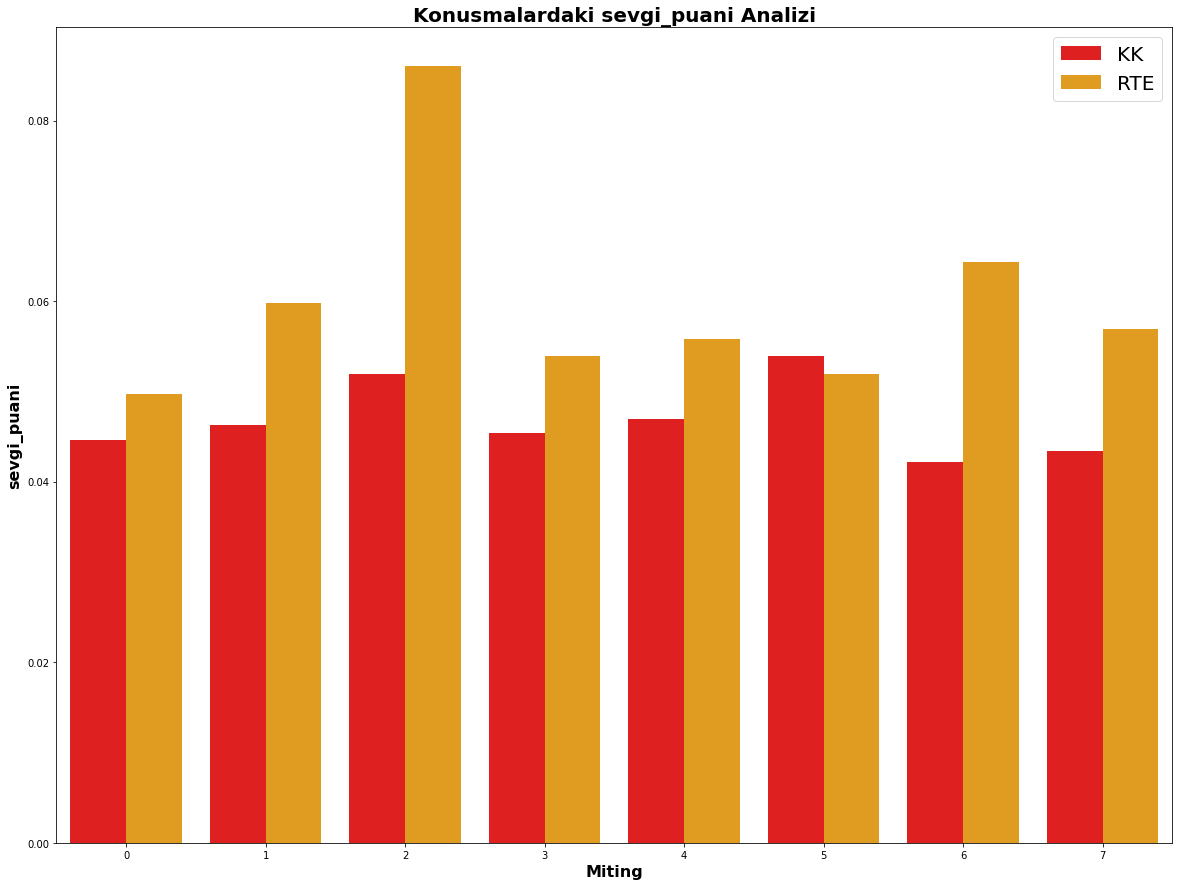

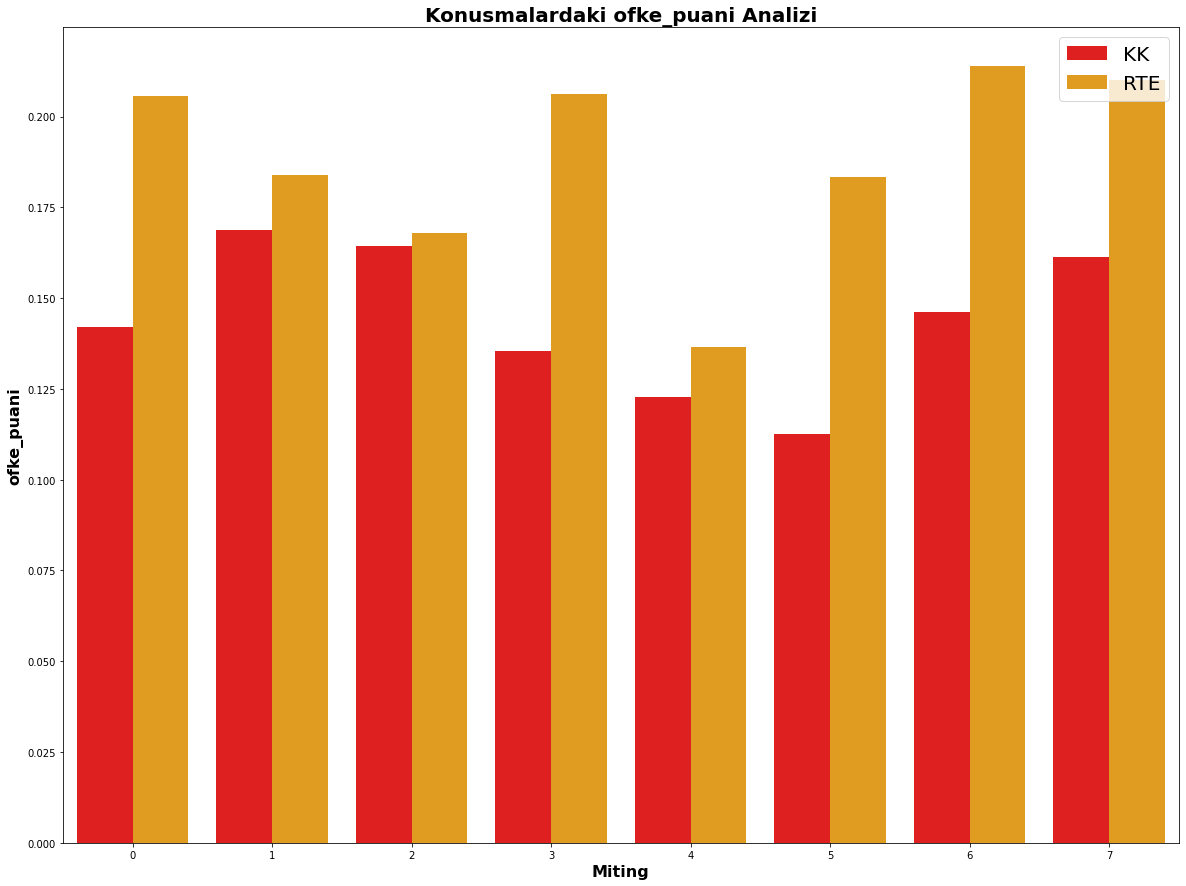

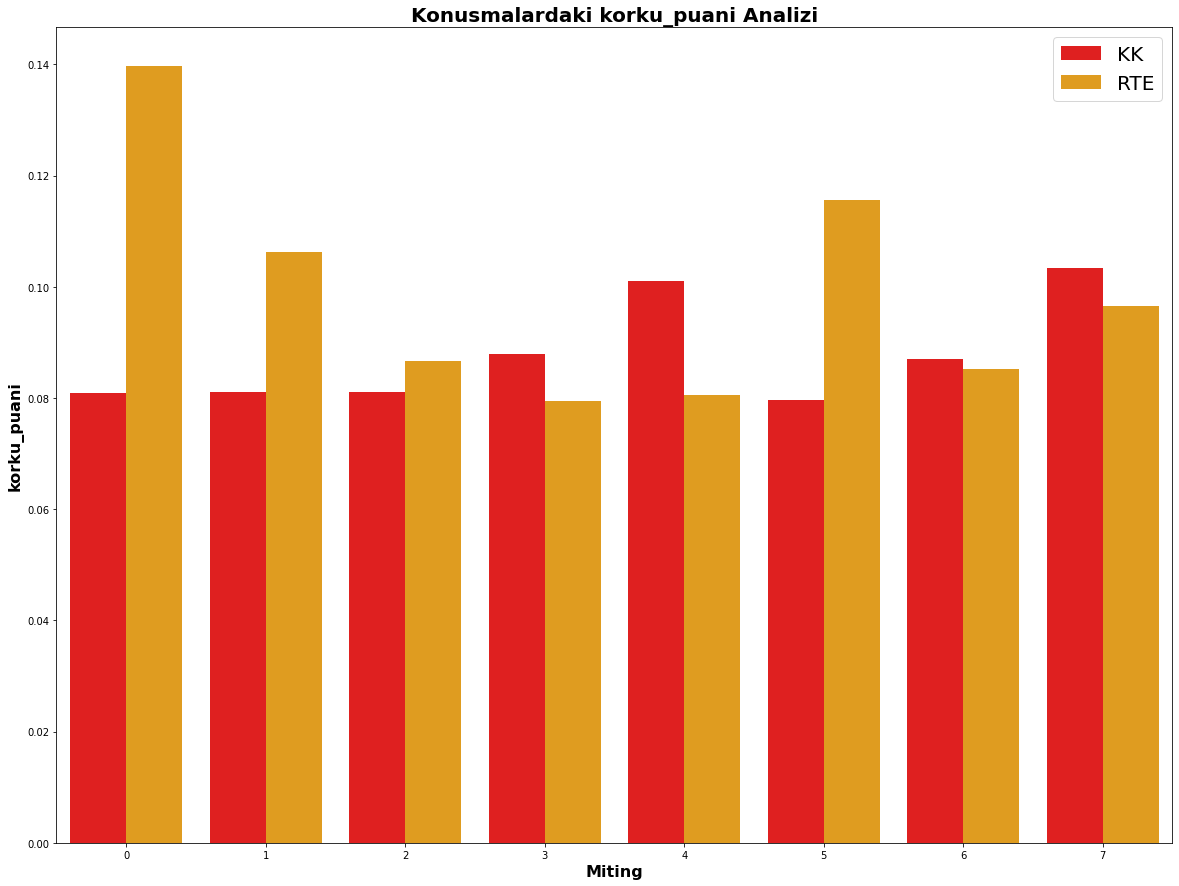

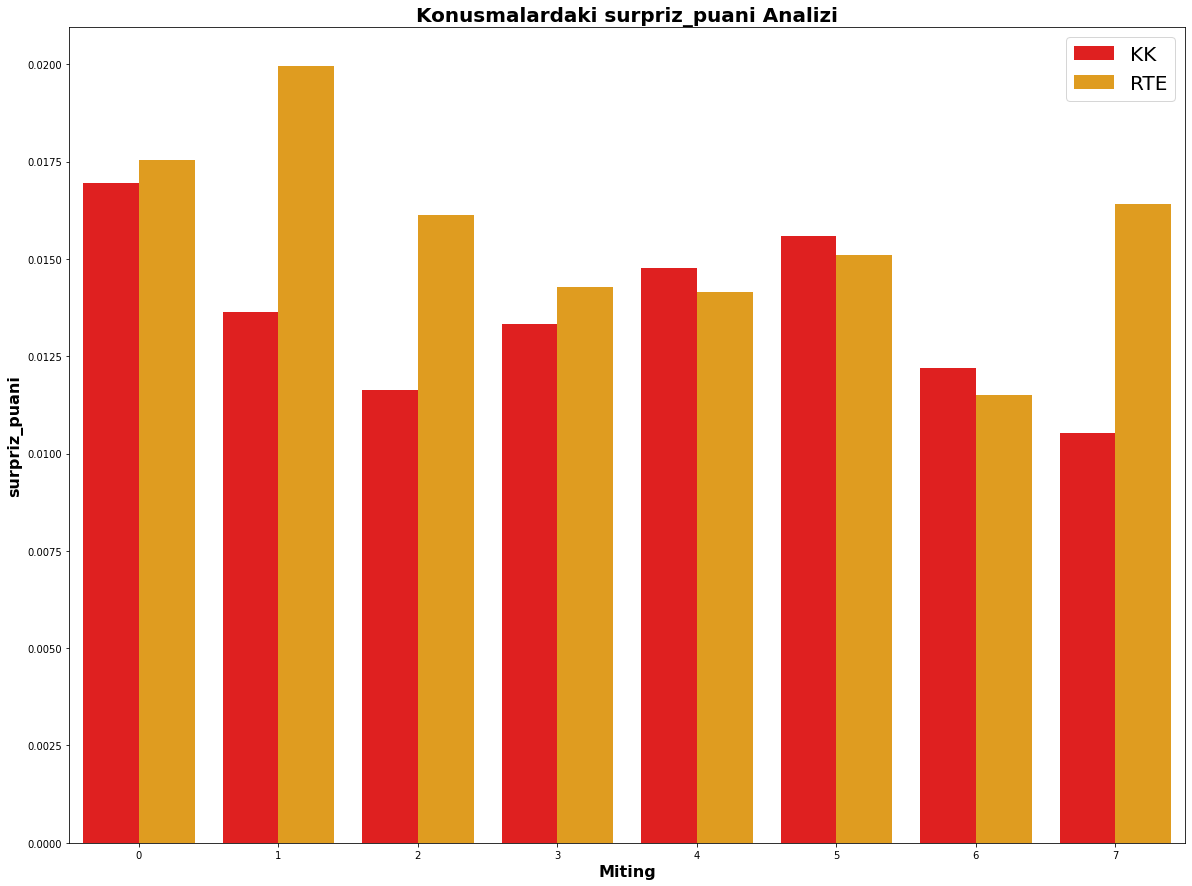

In [55]:
emotions = ['uzuntu_puani', 'nese_puani', 'sevgi_puani', 'ofke_puani', 'korku_puani', 'surpriz_puani']
for emotion in emotions:
    plt.figure(figsize=(20, 15)) 
    sns.barplot(x='source', 
                 y=emotion,
                 palette=['red', 'orange'],
                 hue='candidate',
                 data=both_emotion_records)
    plt.title(f'Konusmalardaki {emotion} Analizi', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
    plt.xlabel('Miting', fontsize = 16, fontdict=dict(weight='bold'))
    plt.ylabel(f'{emotion}', fontsize = 16, fontdict=dict(weight='bold'))
    plt.legend(loc="upper right", frameon=True, fontsize=20)
    plt.show()

In [56]:
candidate_records['word_count'] = candidate_records['text'].str.split().apply(len)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


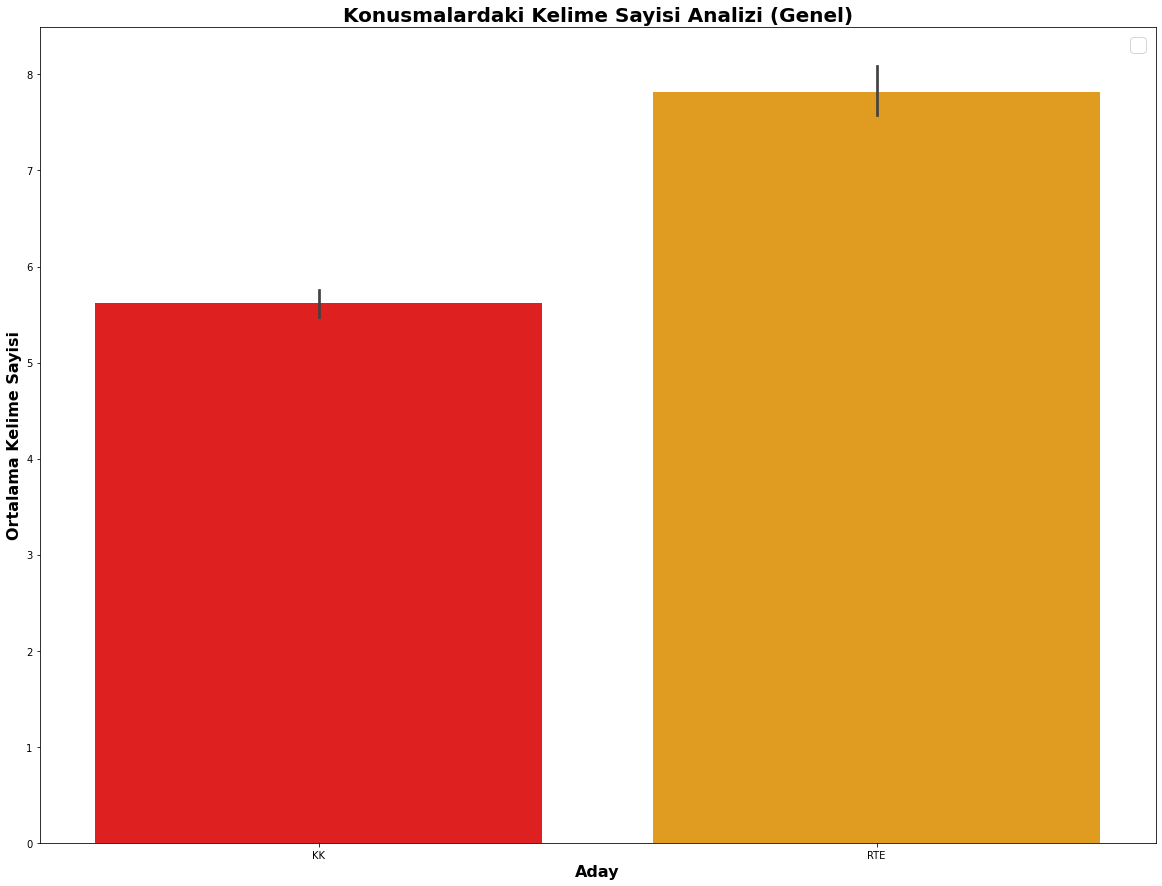

In [57]:
plt.figure(figsize=(20, 15)) 
sns.barplot(x='candidate', 
             y='word_count',
             palette=['red', 'orange'],
             data=candidate_records)

plt.title(f'Konusmalardaki Kelime Sayisi Analizi (Genel)', 
          fontsize = 20, 
          loc='center', 
          fontdict=dict(weight='bold'))

plt.xlabel('Aday', fontsize = 16, fontdict=dict(weight='bold'))
plt.ylabel('Ortalama Kelime Sayisi', fontsize = 16, fontdict=dict(weight='bold'))
plt.legend(loc="upper right", frameon=True, fontsize=20)
plt.show()

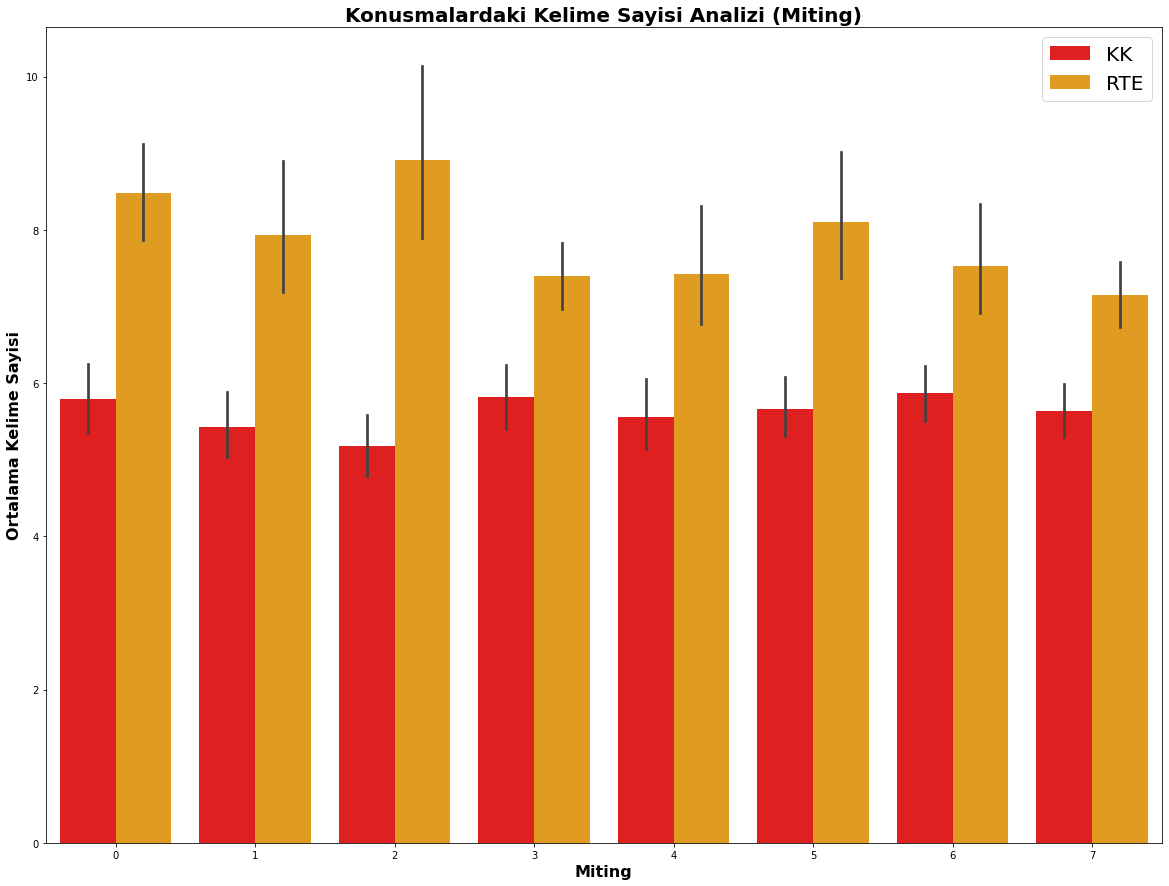

In [58]:
plt.figure(figsize=(20, 15)) 
sns.barplot(x='source', 
             y='word_count',
             palette=['red', 'orange'],
             hue='candidate',
             data=candidate_records)

plt.title(f'Konusmalardaki Kelime Sayisi Analizi (Miting)', 
          fontsize = 20, 
          loc='center', 
          fontdict=dict(weight='bold'))

plt.xlabel('Miting', fontsize = 16, fontdict=dict(weight='bold'))
plt.ylabel('Ortalama Kelime Sayisi', fontsize = 16, fontdict=dict(weight='bold'))
plt.legend(loc="upper right", frameon=True, fontsize=20)
plt.show()

notes:
- KK: genelde turkiye kullaniyor
- RTE: hep sehir ismi kullaniyor ve unigram'da hep en onemlilerde
- KK: secim tarihinden cok bahsetmiyor
- RTE: bigramlari inceledigimizde, 'on dort mayis' tarihi uzerinden hep bir vurgu var